In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
df=pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [7]:
df.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [8]:
df.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [10]:
df['US']=df['US'].map({"Yes":1,"No":0})

In [11]:
df 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,1
397,7.41,162,26,12,368,159,Medium,40,18,Yes,1
398,5.94,100,79,7,284,95,Bad,50,12,Yes,1


In [12]:
df['Urban']=df['Urban'].map({"Yes":1,"No":0})
df['ShelveLoc']=df['ShelveLoc'].map({"Good":1,"Bad":0,"Medium":2})

In [13]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [17]:
x=df.iloc[:,1:]

In [19]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [67]:
df['Sales'].mean()

7.496325

In [70]:
df["Sales"]=np.where(df["Sales"]<=df['Sales'].mean(),1,0)

In [71]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [72]:
y=df['Sales']

In [73]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales, Length: 400, dtype: int32

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [75]:
x_train.shape,y_train.shape

((320, 10), (320,))

In [77]:
x_test.shape,y_test.shape

((80, 10), (80,))

In [87]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

[Text(194.73061224489797, 199.32, 'X[4] <= 131.5\ngini = 0.5\nsamples = 320\nvalue = [164, 156]'),
 Text(109.32244897959184, 163.07999999999998, 'X[2] <= 6.5\ngini = 0.478\nsamples = 245\nvalue = [148, 97]'),
 Text(54.66122448979592, 126.83999999999999, 'X[4] <= 100.5\ngini = 0.497\nsamples = 124\nvalue = [57, 67]'),
 Text(27.33061224489796, 90.6, 'X[6] <= 67.0\ngini = 0.369\nsamples = 41\nvalue = [31, 10]'),
 Text(13.66530612244898, 54.359999999999985, 'X[5] <= 0.5\ngini = 0.245\nsamples = 35\nvalue = [30, 5]'),
 Text(6.83265306122449, 18.119999999999976, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(20.49795918367347, 18.119999999999976, 'gini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(40.99591836734694, 54.359999999999985, 'X[3] <= 359.0\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(34.16326530612245, 18.119999999999976, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(47.82857142857143, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(81.99183

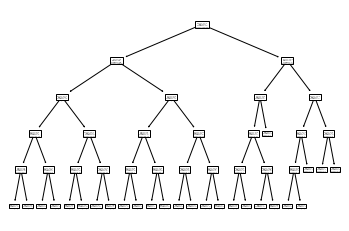

In [88]:
tree.plot_tree(model)

In [89]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

1    42
0    38
dtype: int64

In [93]:
preds

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [95]:
y_test.values

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [90]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales,,
0,27,8
1,11,34


In [91]:
np.mean(preds==y_test)

0.7625

In [92]:
model.score(x_test,y_test)

0.7625